# PROJECT: HOUSE PRICE PREDICTION

#Question
* ***It loads the California housing dataset, performs some data analysis and visualization, and trains a linear regression model to predict house prices.***

#Solution

#Problem Statement
*  A dataset that describes the houses in California have been given. Now, based on the given features,prediction of the house price is made

#Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#Load DataSet

In [4]:
# Load the California housing dataset
data = fetch_california_housing(as_frame=True)
df = data.frame

#EDA - Exploratory Data Analysis

In [5]:
# Explore the data
df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422

#Adding the Traget column 'PRICE' into the DataFrame

In [6]:
# Add the target variable 'PRICE' to the DataFrame
df['PRICE'] = data.target

In [7]:
df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  PRICE  
0    -122.23        4.526  4.526  
1    -122.22        3.585  3.585  
2    -122.24        3.521  3.521  
3    -122.25        3.413  3.413  
4    -122.25        3.422  3.422

In [8]:
df.tail()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  MedHouseVal  PRICE  
20635    -121.09        0.781  0.781  
20636    -121.21        0.771  0.771  
20637    -121.22        0.923  0.923  
20638    -121.32        0.847  0.847  
20639    -121.24        0.894  0.894

In [9]:
df.shape

(20640, 10)

#List of columns

In [10]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal', 'PRICE'],
      dtype='object')

In [11]:
df.dtypes

MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
PRICE          float64
dtype: object

In [12]:
df.nunique()

MedInc         12928
HouseAge          52
AveRooms       19392
AveBedrms      14233
Population      3888
AveOccup       18841
Latitude         862
Longitude        844
MedHouseVal     3842
PRICE           3842
dtype: int64

# Check for missing values

In [13]:
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
PRICE          0
dtype: int64

In [14]:
df.describe()

MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal         PRICE  
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558      2.068558  
std       10.386050      2.135952      2.003532      1.153956      1.153956  
min        0.692308     32.540000   -124.350000      0.149990      0.149990  
25%        2.429741     33.930000   -121.800000      1.196000      1.196000  
50%        2.818116     34.260000   -118.490000      1.797000      1.797000  
75%        3.282261     37.710000   -118.010000      2.647250      2.647250  
max     1243.333333     41.950000   -114.310000      5.000010      5.000010

In [15]:
df.corr

<bound method DataFrame.corr of        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       

#**Data Visualization-Seaborn**

# Explore the correlation between features using HeatMap

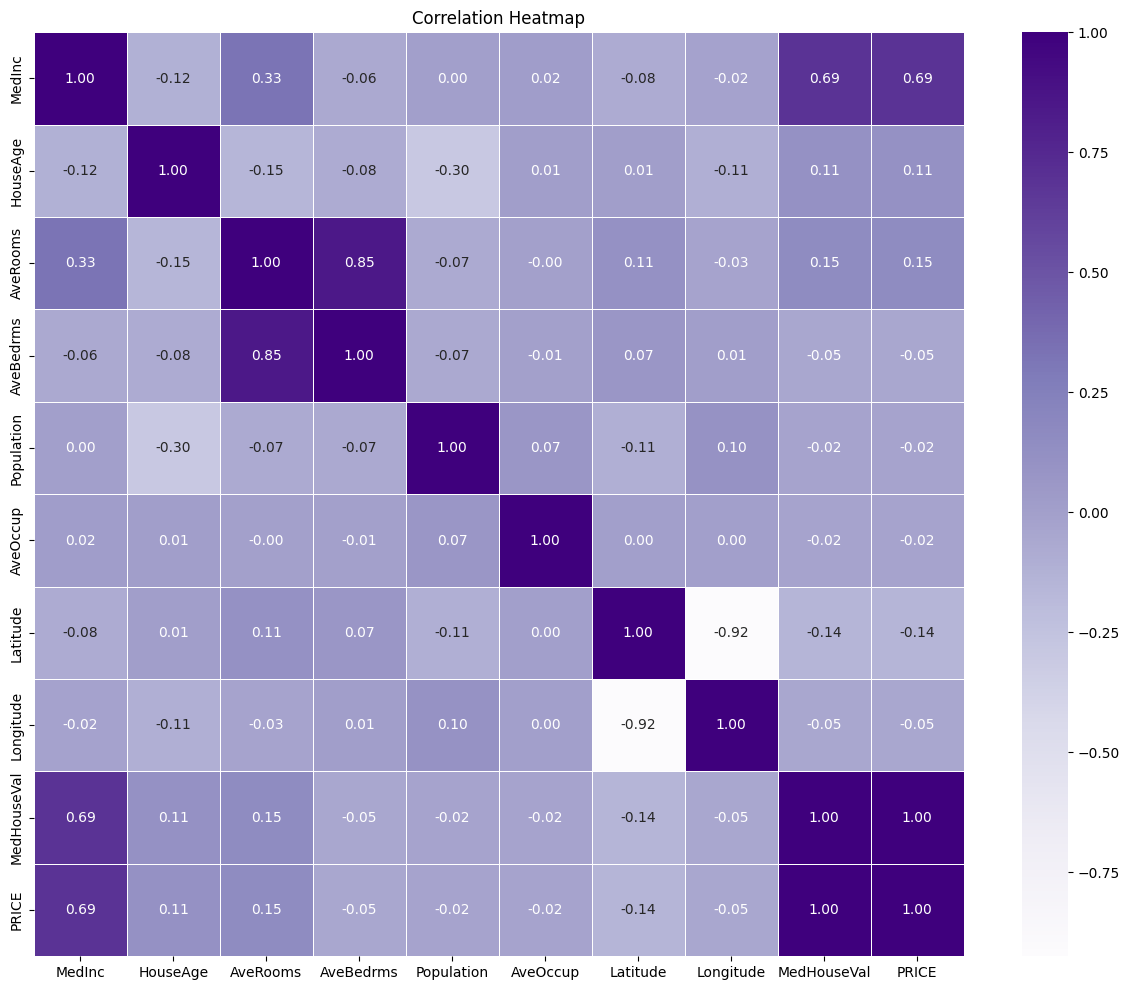

In [16]:
plt.figure(figsize=(15, 12))
sns.heatmap(df.corr(), annot=True, cmap='Purples', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Visualize the relationships between features using pair plots

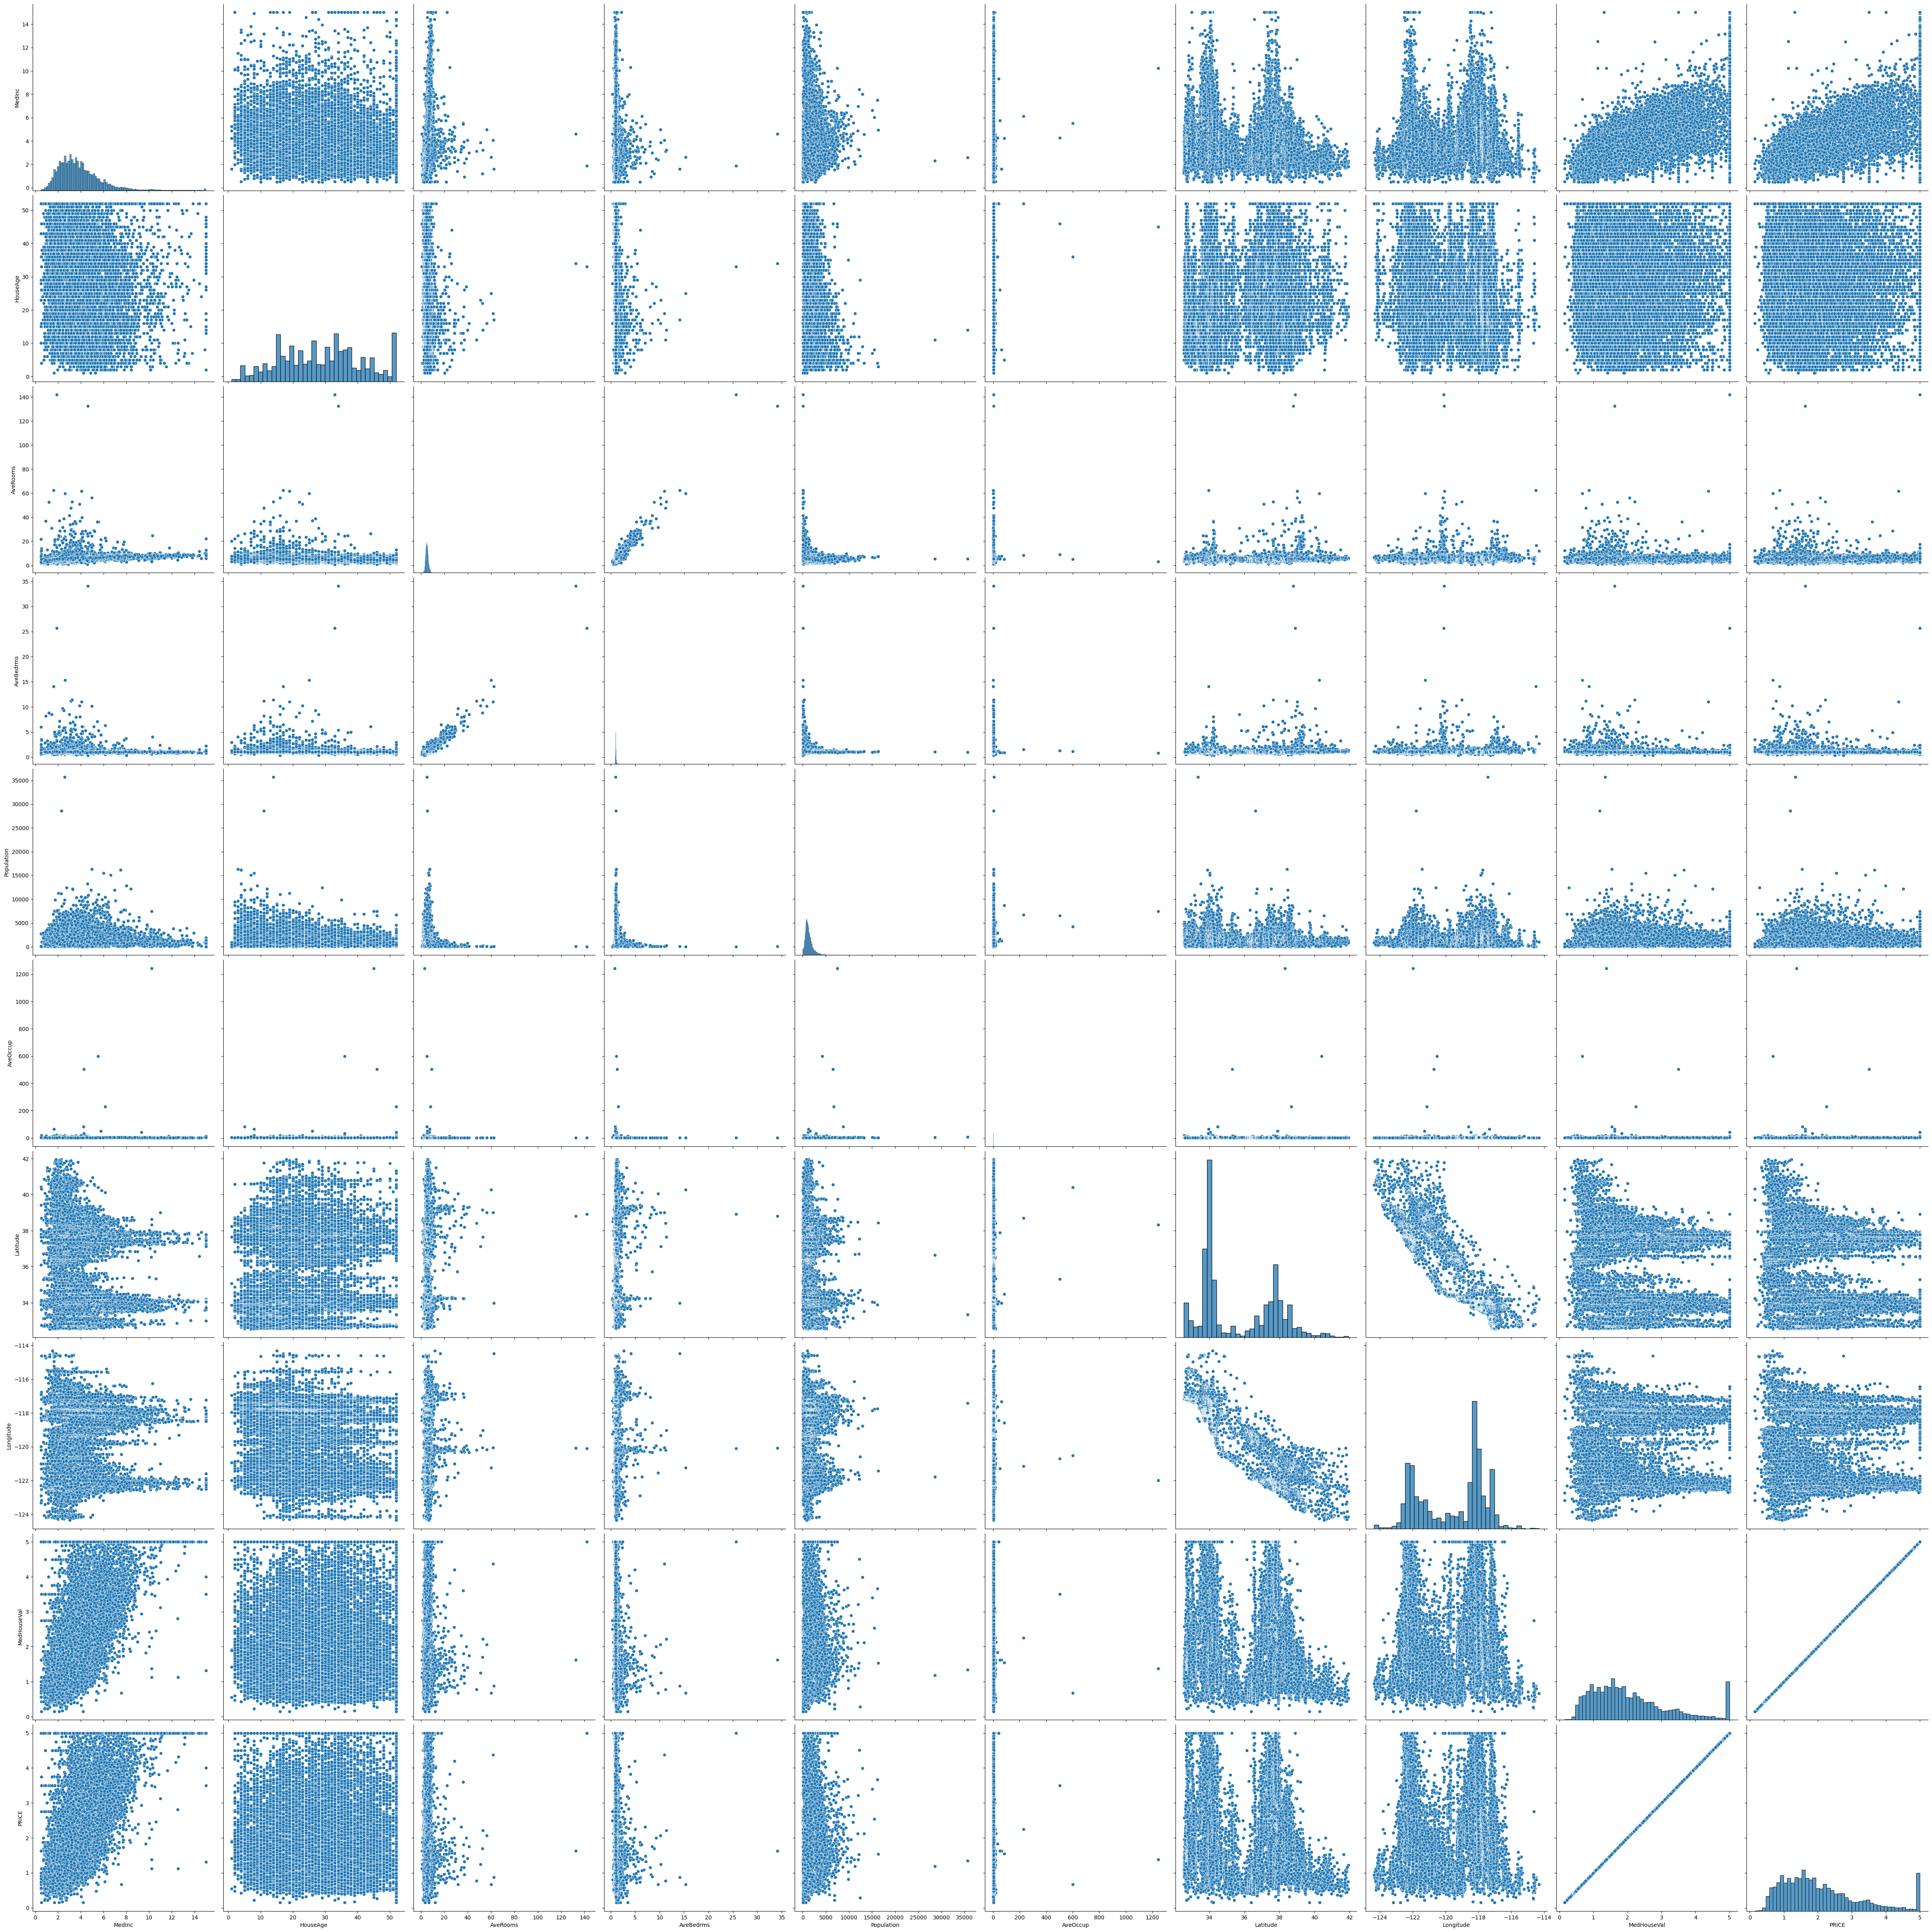

In [17]:
sns.pairplot(df,height=5)
plt.show()

# Plot a Boxplot

<Axes: >

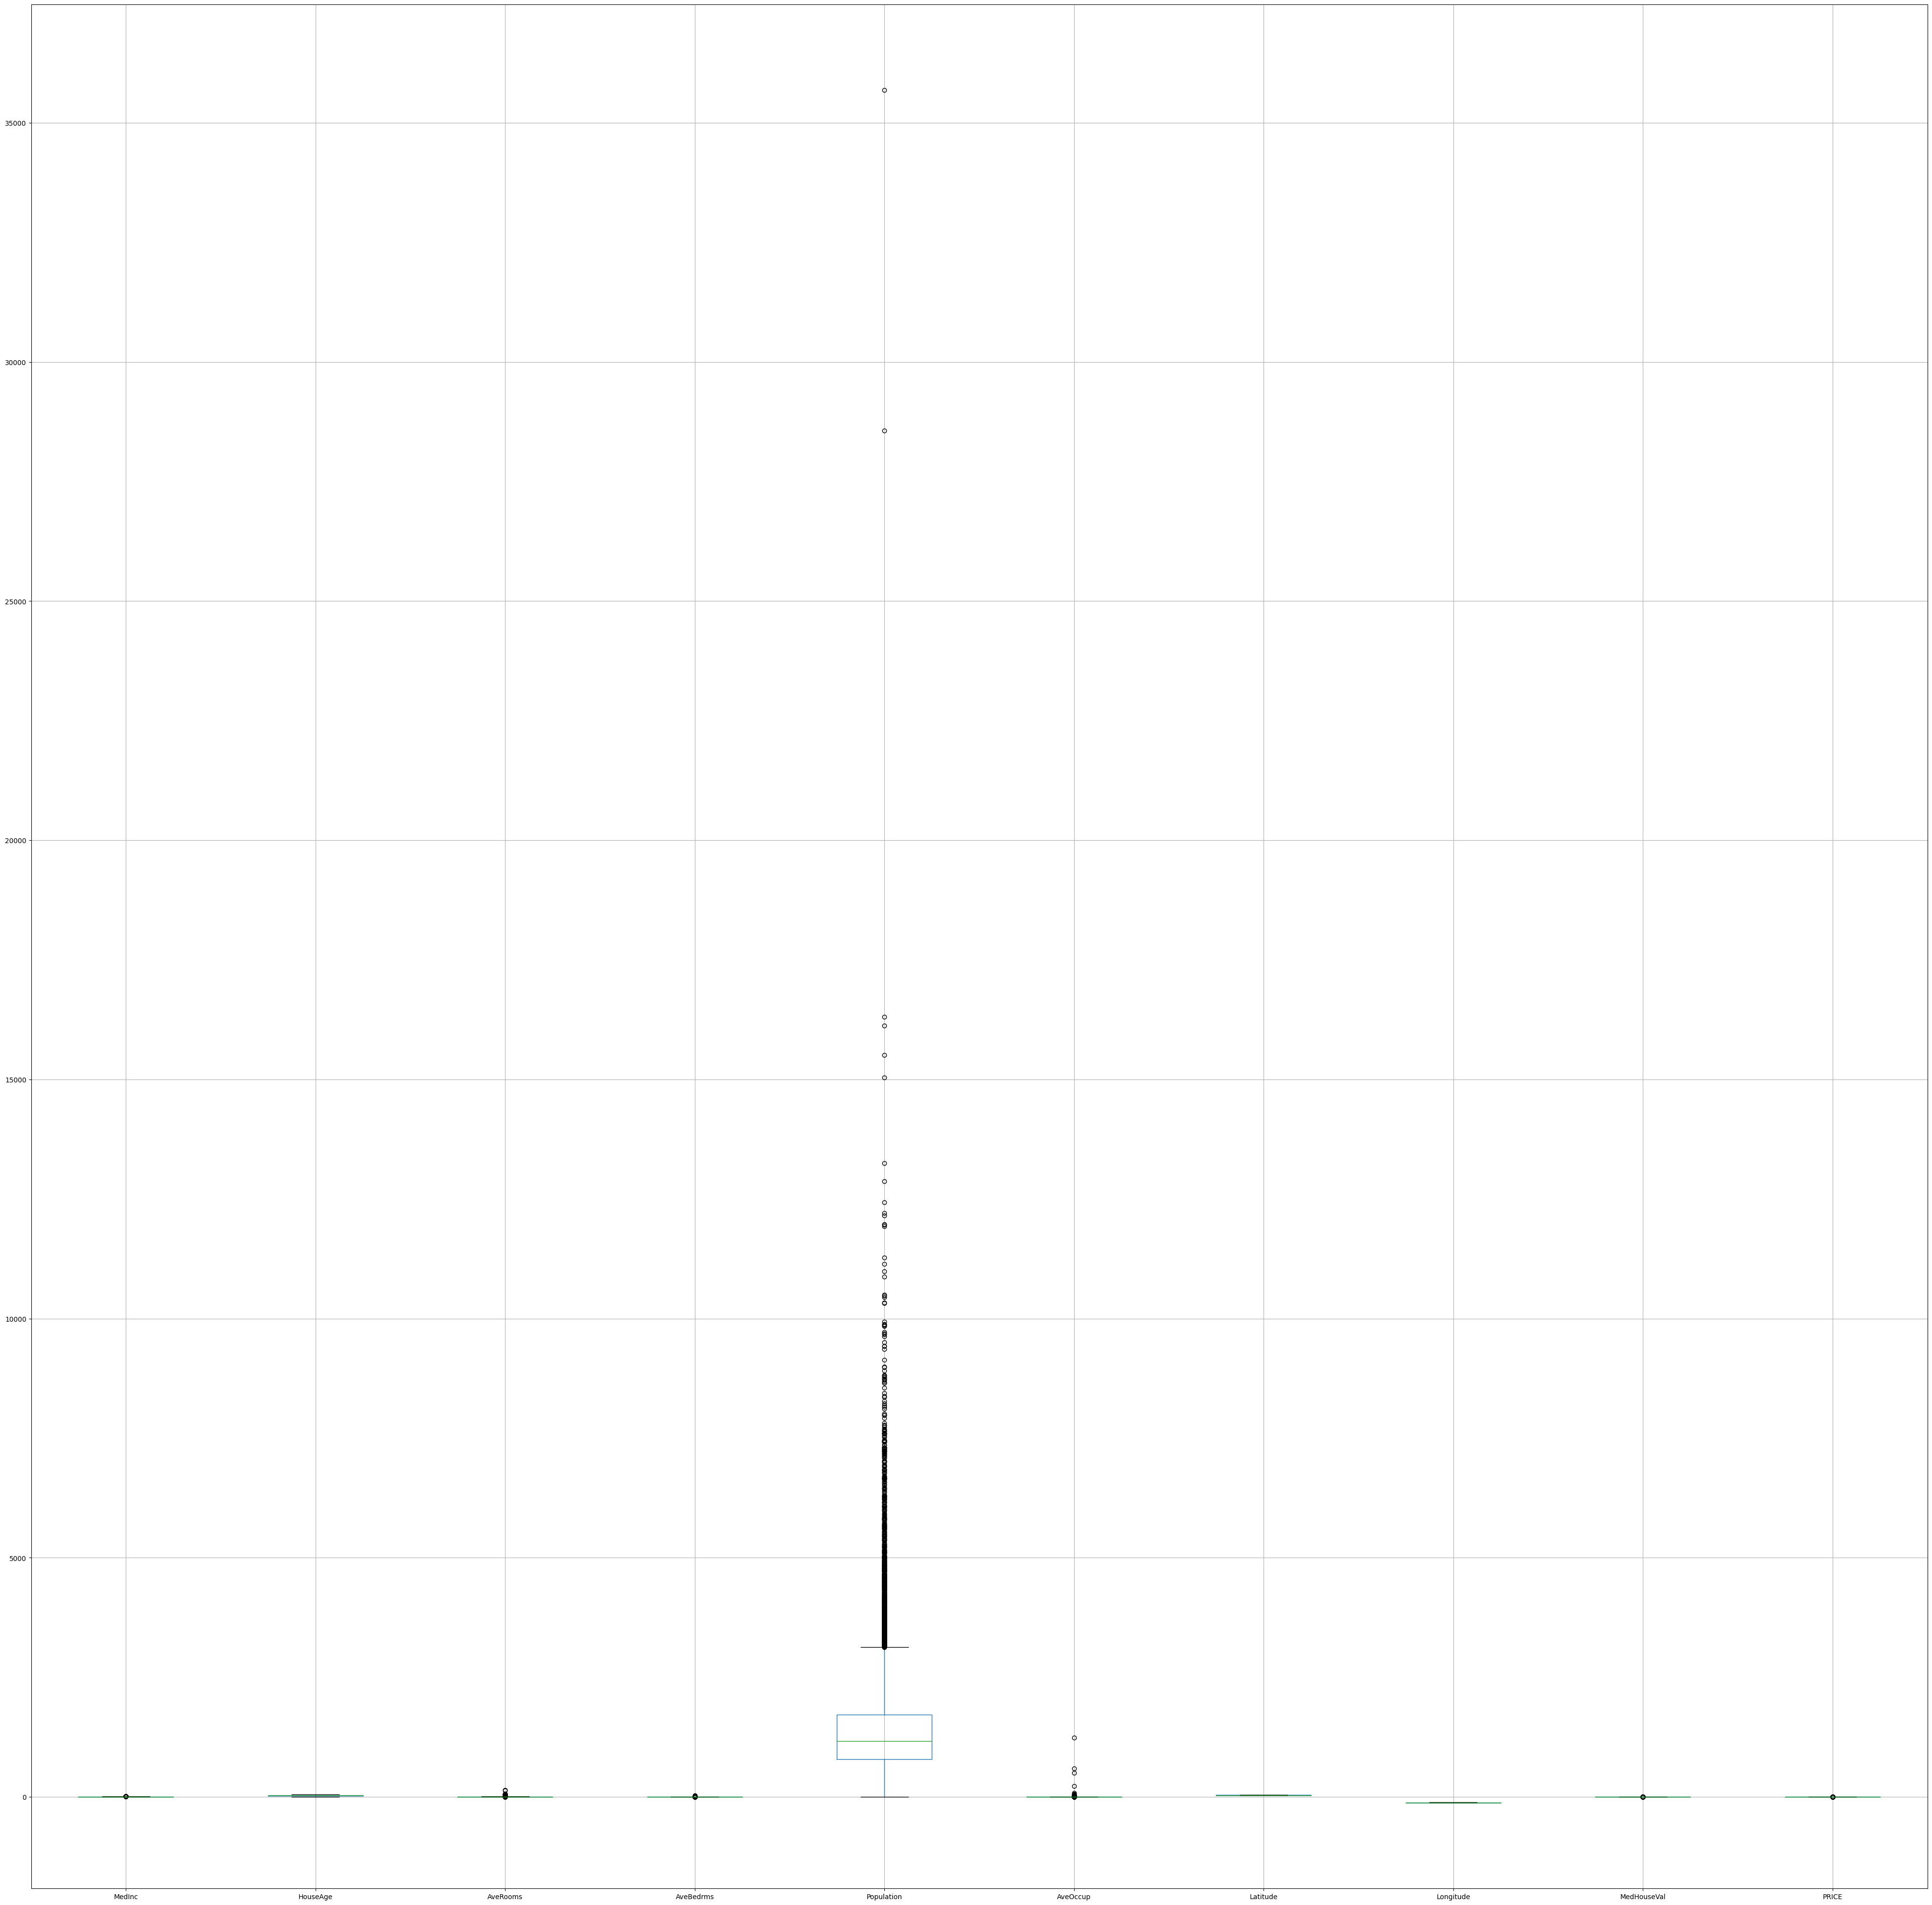

In [18]:
plt.figure(figsize=(50,50))
df.boxplot()

# Minimum Price

In [19]:
df.PRICE.min()

0.14999

# Maximum Price

In [20]:
df.PRICE.max()

5.00001

# Standard Deviation

In [21]:
df.PRICE.std()

1.1539561587441387

#Export the dataset

In [22]:
df.to_csv('boston_datset.csv',)

#Machine Learning -Linear Regression

In [23]:
X=np.array(df.drop('PRICE', axis=1))
y=np.array(df.PRICE)

# Splitting the data

In [24]:
# Split the data into training and testing sets
X = df.drop('PRICE', axis=1)
y = df['PRICE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
len(X_train)

16512

In [26]:
len(y_train)

16512

In [27]:
len(X_test)

4128

In [28]:
len(y_test)

4128

# Initialize and train the linear regression model

In [29]:
model = LinearRegression()

**Fitting/Train the model**

In [30]:
model.fit(X_train, y_train)

LinearRegression()

# Intercept Value

In [31]:
model.intercept_

-1.127986593019159e-13

# Coefficient Value

In [32]:
model.coef_

array([-7.26312037e-16, -2.30371278e-15, -1.45022883e-15,  3.81964425e-16,
        4.16333634e-17,  7.89299182e-17,  6.79144241e-16, -9.01514106e-16,
        1.00000000e+00])

# Make predictions on the test set

In [33]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: PRICE, Length: 4128, dtype: float64

In [34]:
y_pred = model.predict(X_test)

In [35]:
y_pred

array([0.477  , 0.458  , 5.00001, ..., 5.00001, 0.723  , 1.515  ])

# Testing the model performance

In [36]:
model.score(X_test,y_test)

1.0

# Print the evaluation metrics


R Squared

In [37]:
r2 = r2_score(y_test, y_pred)

In [38]:
print('R2 score:', r2)

R2 score: 1.0


MAE

In [39]:
mae = mean_absolute_error(y_test, y_pred)

In [40]:
print('Mean Absolute Error:', mae)

Mean Absolute Error: 4.385153685046546e-14


MSE

In [41]:
mse = mean_squared_error(y_test, y_pred)

In [42]:
print('Mean Squared Error:', mse)

Mean Squared Error: 3.801441519292658e-27


RMSE

In [43]:
np.sqrt(mean_squared_error(y_test,y_pred))

6.165583118645518e-14

# Plot the actual vs predicted house prices

Text(0.5, 1.0, 'Actual vs Predicted House Prices')

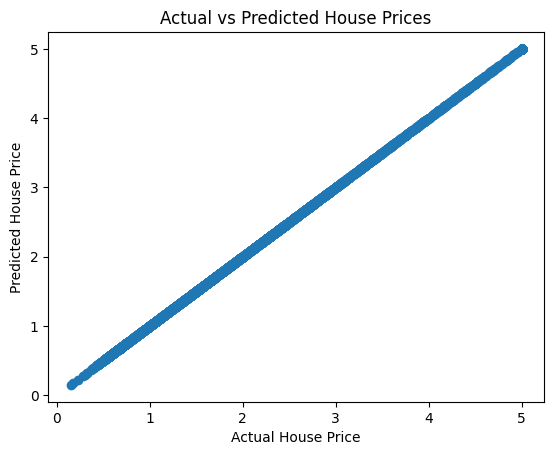

In [44]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual House Price')
plt.ylabel('Predicted House Price')
plt.title('Actual vs Predicted House Prices')
# plt.show()

In [45]:
# Save the DataFrame to a CSV file
df.to_csv('california_dataset.csv', index=True)